In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
pic_class = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = pic_class.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [11]:
print('Training Data Shape: ', x_train.shape)
print('Testing Data Shape: ', x_test.shape)


Training Data Shape:  (50000, 32, 32, 3)
Testing Data Shape:  (10000, 32, 32, 3)


In [12]:
print('Label Training Data Shape: ', y_train.shape)
print('Label Testing Data Shape: ', y_test.shape)

Label Training Data Shape:  (50000, 1)
Label Testing Data Shape:  (10000, 1)


In [13]:
classes = np.unique(y_train)
nClasses = len(classes)

In [14]:
print('Number of Outputs: ', nClasses)
print('Number of Output Classes: ', classes)

Number of Outputs:  10
Number of Output Classes:  [0 1 2 3 4 5 6 7 8 9]


In [15]:
%matplotlib inline

label_list = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck',
}

plt.figure(figsize = [10,10])

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, '(Label: Frog)')


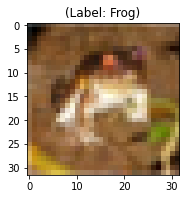

In [16]:
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_list[y_train[0][0]]) + ")"))

Text(0.5, 1.0, '(Label: Cat)')


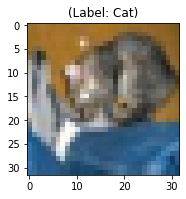

In [17]:
plt.subplot(122)
curr_img = np.reshape(x_test[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_list[y_test[0][0]]) + ")"))

In [18]:
np.min(x_train), np.max(x_train)

(0, 255)

In [19]:
x_train = x_train/255.0
np.min(x_train), np.max(x_train)
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel' + str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat, columns = feat_cols)
df_cifar['Label'] = y_train
print('Size of Data Frame: {}'.format(df_cifar.shape))

Size of Data Frame: (50000, 3073)


In [21]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,Label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [22]:
pca_cifar = PCA(n_components = 2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:, :-1])

In [23]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar,
                                  columns = ['Principal Component 1', 'Principal Component 2'])
principal_cifar_Df['Label'] = y_train
principal_cifar_Df.head()

,Principal Component 1,Principal Component 2,Label
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [24]:
print('Explained Variation per Principal Component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained Variation per Principal Component: [0.2907663  0.11253144]


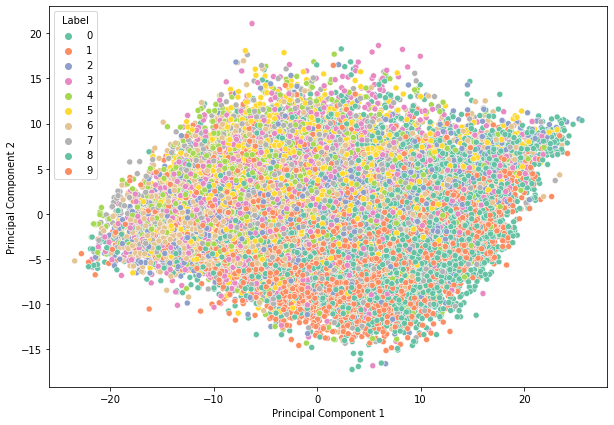

In [25]:
plt.figure(figsize = (10,7))
sns.scatterplot(
    x = "Principal Component 1", y = "Principal Component 2",
    hue = "Label",
    palette = sns.color_palette("Set2", 10),
    data = principal_cifar_Df,
    legend = "full",
    alpha = 1.0
)

In [26]:
x_test = x_test/255.0
x_test = x_test.reshape(-1, 32, 32, 3)
x_test_flat = x_test.reshape(-1, 3072)

In [27]:
pca = PCA(0.99)
pca.fit(x_train_flat)
PCA(copy = True, iterated_power = 'auto', n_components = 0.99, random_state = None, svd_solver = 'auto', tol = 0.0, whiten = False)
pca.n_components_

658

In [28]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [29]:
batch_size = 128
num_classes = 10
epochs = 50

In [30]:
model = Sequential()
model.add(Dense(1024, activation = 'relu', input_shape = (658,)))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              674816    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,383,114
Trainable params: 2,383,114
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])

history = model.fit(train_img_pca,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (test_img_pca, y_test))

Epoch 1/50
391/391 [==============================] - 31s 73ms/step - loss: 1.6263 - accuracy: 0.4265 - val_loss: 1.4229 - val_accuracy: 0.5001
Epoch 2/50
391/391 [==============================] - 28s 72ms/step - loss: 1.2385 - accuracy: 0.5635 - val_loss: 1.3710 - val_accuracy: 0.5198
Epoch 3/50
391/391 [==============================] - 28s 72ms/step - loss: 0.9600 - accuracy: 0.6581 - val_loss: 1.3384 - val_accuracy: 0.5462
Epoch 4/50
391/391 [==============================] - 29s 74ms/step - loss: 0.7015 - accuracy: 0.7523 - val_loss: 1.4548 - val_accuracy: 0.5425
Epoch 5/50
391/391 [==============================] - 28s 72ms/step - loss: 0.4899 - accuracy: 0.8261 - val_loss: 1.7173 - val_accuracy: 0.5506
Epoch 6/50
391/391 [==============================] - 29s 75ms/step - loss: 0.3528 - accuracy: 0.8772 - val_loss: 2.2176 - val_accuracy: 0.5380
Epoch 7/50
391/391 [==============================] - 29s 75ms/step - loss: 0.2712 - accuracy: 0.9081 - val_loss: 2.3521 - val_accuracy: